# Data Complexity and Meta-Learning - Health Insurance

_By: Francisco da Ana (up202108762)_

For this assignement related to **Data Complexity and Meta-Learning**, I will be using the Health Insurance dataset already explored in the first assignement (Data Profiling).

From the suggested tasks for this assignement, I chose the project **A**: 
> "Explore a chosen dataset using `problexity`, `pymfe`, `pyhard` or others. Identify the main complexity factors associated with the data and reflect on their implications to classification algorithms with different learning paradigms (Decision Trees, KNN, SVM)"

First, let's remember the dataset characteristics and the main objective of the dataset:

It contains 15 attributes (1 target and 14 features) and 72458 instances. The target variable is `health_ins`, which is a binary feature that indicates if the individual has health insurance or not. The dataset contains both numerical and categorical features.

The attributes are:
- _`unnamed`_ | **numeric**: an index column
- `custid` | **text**: the unique ID of the customer
- `sex` | **categorical**: the gender of the customer
- `is_employed` | **boolean**: indicates whether the customer is employed or not
- `income` | **numeric**: numerical value representing the customer's income
- `marital_status` | **categorical**: the marital status of the customer
- `health_ins` | **boolean**: indicates whether the customer has health insurance or not. This can be the target variable in the context of a classification problem.
- `housing_type` | **categorical**: describes the situation of the customer's habitation
- `num_vehicles` | **numeric**: the number of vehicles the customer owns
- `age` | **numeric**: the age of the customer in years
- `state_of_res` | **text**: the US state where the customer resides
- `code_column` | **numeric**: likely a categorical or code-based feature (potentially related to location or demographics).
- `gas_usage` | **numeric**: a measure of the customer's gas usage
- `rooms` | **numeric**: the number of rooms in the customer's house
- `recent_move_b` | **boolean**: indicator if the customer has recently moved

For this assignement, we will study the complexity of the dataset and its implications for classification algorithms. We will acess some data complexity metrics and reflect on how they can affect the performance of different learning paradigms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import problexity.classification as px
from problexity import ComplexityCalculator

In [2]:
df = pd.read_csv('../../data/customer.csv')
df.head()

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [3]:
print(f'{len(df.columns)} columns: {df.columns}')

15 columns: Index(['Unnamed: 0', 'custid', 'sex', 'is_employed', 'income',
       'marital_status', 'health_ins', 'housing_type', 'num_vehicles', 'age',
       'state_of_res', 'code_column', 'gas_usage', 'rooms', 'recent_move_b'],
      dtype='object')


One of the problems we identified in the first assignement was the presence of unique identifiers in the dataset, such as the `custid` and _`unnamed`_ columns. These columns are not relevant for the analysis and should be removed, since they are not useful for finding patterns in the data.

In [4]:
# 'Unnamed: 0', 'custid' must be removed
df = df.drop(['Unnamed: 0', 'custid'], axis=1)
df.shape

(72458, 13)

In [5]:
df.isnull().sum()

sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

There are 4 columns where the numebr of missing values is the same. This may indcaite that the missing values are related to the same instances. We will investigate this further.

In [252]:
# Drop rows with missing values in 'recent_move_b'
df = df.dropna(subset=['recent_move_b'])
df.isnull().sum()

sex                   0
is_employed       24104
income                0
marital_status        0
health_ins            0
housing_type          0
num_vehicles          0
age                   0
state_of_res          0
code_column           0
gas_usage             0
rooms                 0
recent_move_b         0
dtype: int64

In [253]:
df.shape

(70771, 13)

Let's divide the dataset into features (X) and target (y).

In [254]:
target = 'health_ins'
X = df.drop(target, axis=1)
y = df[target]

Finally, missing values for categerical features will be treated as a new category, and for numerical features, we will use the median value to fill the missing values.

In [255]:
X.isnull().sum()

sex                   0
is_employed       24104
income                0
marital_status        0
housing_type          0
num_vehicles          0
age                   0
state_of_res          0
code_column           0
gas_usage             0
rooms                 0
recent_move_b         0
dtype: int64

In [256]:
# Categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
cat_cols

Index(['sex', 'is_employed', 'marital_status', 'housing_type', 'state_of_res',
       'recent_move_b'],
      dtype='object')

In [257]:
# Convert categorical columns to numerical
for col in cat_cols:
    X[col] = X[col].astype('category').cat.codes

X.head()

,sex,is_employed,income,marital_status,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,1,1,22000.0,2,0,0.0,24,0,1047,210.0,3,0
1,0,-1,23200.0,0,3,0.0,82,0,1047,3.0,6,1
2,0,1,21000.0,2,1,2.0,31,0,1047,40.0,3,0
3,0,-1,37770.0,3,0,1.0,93,0,1047,120.0,2,0
4,1,1,39000.0,0,3,2.0,67,0,1047,3.0,2,0


In [258]:
X.isnull().sum().sum()

np.int64(0)

## **Data Complexity Measures**

To understand better some characteristics of our data, like the presence of ambuguous values, difficult boundary decisions and sparcity/dimensionality issues, we will use the `problexity` library to calculate some data complexity measures.

These measures can be divided into 6 main categories:

1. Feature-Based Measures
2. Linearity Measures
3. Dimensionality Measures
4. Class Imbalance Measures
5. Neighbourhood Measures
6. Network Measures

### 1. **Feature Based Measures**

Feature-based measures help understand the characteristics and relationships of features in a dataset. They provide insights into **feature interactions**, **predictive power**, and **redundancy**.

In [259]:
measures = dict()

fb_measures = {
    'f1': round(px.f1(X, y), 3),
    'f2': round(px.f2(X, y), 3),
    'f3': round(px.f3(X, y), 3),
    'f4': round(px.f4(X, y), 3),
}
measures['FB-measures'] = fb_measures

fb_measures

{'f1': np.float64(0.947),
 'f2': np.float64(0.289),
 'f3': np.float64(0.994),
 'f4': np.float64(0.994)}

#### **F1** = 0.947 (Class Separability)

The meaning of this measure is *"How separated classes (target) are?"*

This is a good score (close to 1):
- Indicates there is reasonable separation between insurance holders and non-holders;
- Suggests the features can capture meaningful differences between the two groups;

#### **F2** = 0.289 (Feature Overlap)

The meaning of this measure is *"What's the maximum amount of overlap between classes?"*

Shows moderate overlap (28.9%) between classes.
This is actually quite reasonable for insurance prediction because
- Similar people can make different insurance choices
- Personal preferences and risk tolerance play a role
- Although classes are distinct in a multidimensional sense, there are specific features where they overlap significantly

#### **F3** = 0.994 (Best Single Feature)

The meaning of this measure is *"How well can a single feature predict the target?"*

This is a very high score (close to 1):
- There is a feature that can predict the target very well, even on its own
- This feature is likely very important for insurance prediction
- ... and may be a leaky feature


#### **F4** = 0.994 (Combined Feature Effectiveness)

The meaning of this measure is *"How well do the features work together to predict the target?"*

This is an excellent score (very close to 1)
- Features work very well together
- The combination of all features provides strong predictive power


#### **Overall Analysis**
The combined analysis of these measures suggests:
- Dataset has strong predictive potential
- Features work better together than individually
- The possible presence of a leaky feature must be considered

### 2. **Linearity Measures**

Linearity measures assess the linear separability of classes in a dataset. They evaluate how easily the different classes can be distinguished using a **linear decision boundary**. These measures provide insights into the geometric structure of the data, helping to understand whether a linear classifier would be effective.

In [260]:
lin_measures = dict()

# This loop may take a few minutes to run
for i in range(3):
    print(f'Round {i}: {lin_measures}')
    if i == 0:
        lin_measures['l1'] = round(px.l1(X, y), 3)
    elif i == 1:
        lin_measures['l2'] = round(px.l2(X, y), 3)
    else:
        lin_measures['l3'] = round(px.l3(X, y), 3)

measures['LIN-measures'] = lin_measures

lin_measures

Round 0: {}
Round 1: {'l1': np.float64(0.083)}
Round 2: {'l1': np.float64(0.083), 'l2': np.float64(0.091)}


{'l1': np.float64(0.083), 'l2': np.float64(0.091), 'l3': np.float64(0.091)}

#### **L1** = 0.083 (Sum of Error Distance)
The meaning of this measure is *"How much error remains after attempting linear separation?"*

This is a very good score (close to 0):
- Classes can be separated with minimal error using linear boundaries
- Points to the problem being largely linearly separable

#### **L2** = 0.091 (Error rate of linear classifier)
The meaning of this measure is *"What is the proportion of instances the linear classifier misclassified?"*

This is a strong score (close to 0):
- Linear decision boundaries are quite effective for this problem
- Only 9% of points are misclassified by a linear classifier

#### **L3** = 0.091 (Non-linearity Measure)
The meaning of this measure is "*How consistently does a linear classifier perform on interpolated points?"*

This is a good score (close to 0):
- Shows that linear decision boundaries generalize relatively well to interpolated points
- Suggests that the groups in the data are mostly separate from each other, so there is a stable and smooth decision boundary

#### **Overall Analysis**
The combined analysis of these measures suggests:
- Dataset exhibits strong linear characteristics
- There's no need for complex non-linear models
- The problem space is well-structured with clear decision boundaries

### 3. **Dimensionality Measures**

Dimensionality measures assess how the complexity of data changes with the **number of features** (or dimensions) in a dataset. When the number of features is high, data points can become more spread out, and **relationships between them may become harder to identify**. These measures help us understand the structure of data in high-dimensional spaces and how well a model might perform.

In [261]:
dim_measures = {
    't2': round(px.t2(X, y), 4),
    't3': round(px.t3(X, y), 5),
    't4': round(px.t4(X, y), 3),
}

measures['DIM-measures'] = dim_measures
dim_measures

{'t2': 0.0002, 't3': 1e-05, 't4': 0.083}

#### **T2** = 2 * 10<sup>-4</sup> (Average Number of Features per Dimension)

The formula of this measure is:

$$
T2 = \frac{\text{Number of Features}}{\text{Number of Instances}}
$$

I think something is not very clear about it. Its description does not make much sense, considering its formula. 

The number of **features** is, by definition, the number of attributes (columns) ou dataset contains to predict the target. The number of **dimensions** is the number of attributes that are actually used to represent the data - the problem can be solved in a problem space with fewer or more dimensions than the number of features. For example, the kernel trick in SVMs can project the data into a higher-dimensional space to make it linearly separable. In the other and, PCA can reduce the problem to a lower-dimensional space while preserving most of the variance.

To address this issue, I opened an [issue](https://github.com/w4k2/problexity/issues/9) in the `problexity` repository to clarify this measure:

<img src="imgs/issue_t2.png" width="800">

Finally, looking at the obtained value, it is very low. It indicates that, for the number of features in the dataset, the number of instances is very high.

#### **T3** = 10<sup>-5</sup> (Average Number of PCA Dimensions per Data Point)

This measure executes Principal Component Analysis (PCA) on the data and calculates the average number of dimensions needed to capture most of the variance in the data. They are, then, compared to the number of instances in the dataset.

This value is lower than T2, which is expected, since PCA is a dimensionality reduction technique that aims to reduce the number of dimensions while preserving most of the variance in the data. 

#### **T4** = 0.083 (Ration of the PCA dimension to the original dimension)

The meaning of this measure is *"how many of the original features are needed to to capture most of the variance in the data??"*

A low score (8.3%) may indicate that:
- A significant portion of the features may be redundant or nor very informative
- Features might be considerably correlated
- The dataset may benefit from feature selection or dimensionality reduction

In [262]:
print(f'Number of dimensions:\nBefore PCA: {X.shape[1]}\nAfter PCA: {round(X.shape[1]*measures["DIM-measures"]["t4"])}')

Number of dimensions:
Before PCA: 12
After PCA: 1


PCA measures reveal that the 12 features can be reduced to a space of 1 dimension (like an isolated axis) and still capture 95% of the variance in the data.


#### **Overall Analysis**
The combined analysis of these measures suggests:
- The dataset is very sparse across features
- Many features may not be relevant for the target
- Dimensionality reduction or feature selection may be beneficial
- This problem can be solved in a one-dimensional space

### 4. **Class imbalance Measures**

Class imbalance measures assess the **distribution of classes** in a dataset. They help understand **how balanced or imbalanced the classes are**, which is important for classification tasks. Imbalanced classes can lead to **biased models** that favor the majority class, so it's important to address this issue.

In [263]:
y.value_counts()/len(y)*100

health_ins
True     90.910119
False     9.089881
Name: count, dtype: float64

In [264]:
cimb_measures = {
    'c1': round(px.c1(X, y), 3),
    'c2': round(px.c2(X, y), 3),
}

measures['CIMB-measures'] = cimb_measures
cimb_measures

{'c1': np.float64(0.561), 'c2': np.float64(0.802)}

#### **C1** = 0.561 (Entropy of Class Proportion)

The meaning of this measure is *"How does the distribution of the classes impact the effectiveness of a classifier?"*

This is a moderate score:
- There is some degree of incertainty or disorder in the class distribution
- ML models for classifying this data may face some challenges

#### **C2** = 0.802 (Imbalance Ratio)

The meaning of this measure is *"How greater is the proportion of the majority class compared to the minority class?"*

This value reflects a considerable imbalance:
- There is still some representation of the minority class
- However, the majority class is significantly more prevalent

#### **Overall Analysis**
The combined analysis of these measures suggests:
- The dataset has a considerable class imbalance
- The majority class is significantly more prevalent
- ML models may be biased towards the majority class

### Problem! **Neighbourhood** and **Network Measures**

The dataset contains about 70k records... and the `problexity` library is taking too long to calculate the neighbourhood and network measures. Even the `pymfe` library results in the same issue.

The calculation of neighbourhood and network metrics is **computationally too expensive** because they rely on pairwise distance calculations and graph-based structures, which scale poorly with data size and result in infeasible algorithms for large datasets.

In [265]:
X.shape[0], len(y)

(70771, 70771)

### Solution...? **Stratified Sampling**

The idea is reducing the dataset size to 10% (about 7k rows), trying to preserve its characteristics in order to study neighbourhood and network measures in a reliable sample.

In [266]:
from sklearn.model_selection import train_test_split

X_resampled, _, y_resampled, _ = train_test_split(X, y, test_size=0.9, stratify=y, random_state=42)

# X_resampled and y_resampled now contain 10% of the original data
X_resampled.shape[0], len(y_resampled)

(7077, 7077)

Now we can look at the remaining data quality measures!

### 5. **Neighbourhood Measures**

These measures analyze the neighborhoods around instances of each class to determine if instances from different classes are **mixed** or if they **cluster** distinctly within their own class. If classes are highly mixed, models might find it challenging to accurately classify instances, indicating high complexity; clear separation suggests lower complexity and often easier classification.

In [267]:
neigh_measures = dict()

# This loop may take a few minutes to run
for i in range(6):
    print(f'Round {i}: {neigh_measures}')
    if i == 0:
        neigh_measures['n1'] = round(px.n1(X_resampled, y_resampled), 3)
    elif i == 1:
        neigh_measures['n2'] = round(px.n2(X_resampled, y_resampled), 3)
    elif i == 2:
        neigh_measures['n3'] = round(px.n3(X_resampled, y_resampled), 3)
    elif i == 3:
        neigh_measures['n4'] = round(px.n4(X_resampled, y_resampled), 3)
    elif i == 4:
        neigh_measures['t1'] = round(px.t1(X_resampled, y_resampled), 3)
    else:
        neigh_measures['lsc'] = round(px.lsc(X_resampled, y_resampled), 3)

neigh_measures

Round 0: {}
Round 1: {'n1': np.float64(0.079)}
Round 2: {'n1': np.float64(0.079), 'n2': np.float64(0.86)}
Round 3: {'n1': np.float64(0.079), 'n2': np.float64(0.86), 'n3': np.float64(0.158)}
Round 4: {'n1': np.float64(0.079), 'n2': np.float64(0.86), 'n3': np.float64(0.158), 'n4': np.float64(0.097)}
Round 5: {'n1': np.float64(0.079), 'n2': np.float64(0.86), 'n3': np.float64(0.158), 'n4': np.float64(0.097), 't1': 0.277}


{'n1': np.float64(0.079),
 'n2': np.float64(0.86),
 'n3': np.float64(0.158),
 'n4': np.float64(0.097),
 't1': 0.277,
 'lsc': np.float64(0.997)}

#### **N1** = 0.079 (Fraction of borderline points)

This metrics answers the question *"If we represent the data in a Minimum Spanning Tree, what fraction of the points from different classes are connected?"*

This is a relatively low score (7.9%):
- Suggests most instances are well-separated from other classes
- It is a positive indicator for classification tasks


#### **N2** = 0.86 (Ratio of intra/extra class NN distance)

This metrics answers the question *"How close are instances from the same class compared to instances from different classes?"*

This is a high score (86%):
- Intra classes are quite close compared to the distances between different classes
- Instances from the same class tend to cluster together
- Most of the instances are clearly distinguishable

#### **N3** = 0.158 (Error rate of NN classifier)

This metrics answers the question *"What is the error rate of a 1-nearest neighbor classifier when classifying the dataset under a leave-one-out protocol?"*

This is not an horrible score (15.8%), but could be better:
- Error rate is relatively low, but not negligible
- The model may struggle a bit with some instances that are close to the decision boundary

#### **N4** = 0.093 (Nonlinearity of NN classifier)

This metrics answers the question *"How does the accuracy of a nearest neighbor classifier change with synthetic points?"*

This is a considerable score (9.3%):
- The classifier might struggle a bit with points created from combinations of already known instances
- The model may not generalize well to unseen data

#### **T1** = 0.257 (Fraction of hyperspheres covering data)

This measure aims to answer the question *"What fraction of the original data points do we need to maintain to fully define our class regions?"*

This is a moderate score (25.7%), but still good:
- Classes are well-clustered/compact
- The problem isn't very scattered or complex

#### **LSC** = 0.997 (Local set average cardinality)

Ths metrics answers the question *"On average, how many neighbors of the same class can we reach before hitting a point of a different class?"*

This is a very high score (99.7%):
- The dataset is well-clustered and the classes are clearly separated
- The model should have no problem finding the correct class for most instances

#### **Overall Analysis:**
The combined analysis of these measures suggests:
- The dataset exhibits very good structure and separation between classes
- Instances from the same class cluster together
- Generally, the model should have no problem finding the correct class for most instances

### 6. **Network Measures**

Network measures analyze the relationships between instances in a dataset, treating them as nodes in a graph. These measures help understand how instances are connected and how information flows through the data.

In [268]:
netw_measures = dict()

# This loop may take a few minutes to run
for i in range(3):
    print(f'Round {i}: {netw_measures}')
    if i == 0:
        netw_measures['clsCoef'] = round(px.clsCoef(X_resampled, y_resampled), 3)
    elif i == 1:
        netw_measures['density'] = round(px.density(X_resampled, y_resampled), 3)
    else:
        netw_measures['hubs'] = round(px.hubs(X_resampled, y_resampled), 3)

netw_measures

Round 0: {}
Round 1: {'clsCoef': np.float64(0.502)}
Round 2: {'clsCoef': np.float64(0.502), 'density': np.float64(0.979)}


{'clsCoef': np.float64(0.502),
 'density': np.float64(0.979),
 'hubs': np.float64(0.924)}

#### **clsCoef** = 0.502 (Clustering coefficient)

This metrics answers the question *"How likely are two neighbors of a node to be also connected?"*

This is a moderate score (50.2%):
- There are some clusters but not too many
- Neighbors of points are somewhat likely to connect to each other

#### **density** = 0.979 (Density)

This metrics answers the question *"What fraction of the possible connections in the network are actually not present?"*

This is a very high score (97.9%):
- There are few edges in the network
- The network is sparse

#### **hubs** = 0.924 (Hubs)

This metrics answers the question *"Are there central 'popular' points that connect to many others, and are their neighbors also well-connected?"*

This is a high score (92.4%):
- Many points act as "central" or influential points
- Very strong local neighborhood structure

#### **Overall Analysis:**
The dataset exhibits a strong network structure:
- Very stable, robust class regions
- Good overall separation between classes
- Simple classifiers (like k-NN) should perform well

### **A General Observation**

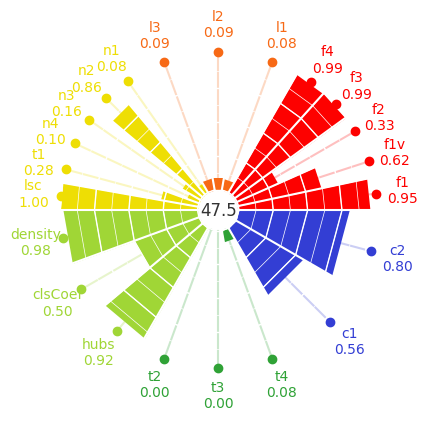

In [269]:
# Fit may take about 1 minute to run
cc = ComplexityCalculator().fit(X_resampled, y_resampled)

# Plot the results
fig = plt.figure(figsize=(5, 5))
cc.plot(fig)

# Save the plot
fig.savefig('imgs/complexity_plot.png')


<ul>
<li><span style="color: red">Red</span> - feature-based measures</li>
<li><span style="color: orange">Orange</span> - linearity measures</li>
<li><span style="color: yellow">Yellow</span> - neighbourhood measures</li>
<li><span style="color: green">Green</span> - network measures</li>
<li><span style="color: teal">Teal</span> - dimensionality measures</li>
<li><span style="color: blue">Blue</span> - class imbalance measures</li>
</ul

In [270]:
measures_resampled = cc.report()['complexities']
measures_resampled

{'f1': np.float64(0.954),
 'f1v': np.float64(0.615),
 'f2': np.float64(0.326),
 'f3': np.float64(0.991),
 'f4': np.float64(0.99),
 'l1': np.float64(0.083),
 'l2': np.float64(0.091),
 'l3': np.float64(0.091),
 'n1': np.float64(0.079),
 'n2': np.float64(0.86),
 'n3': np.float64(0.158),
 'n4': np.float64(0.096),
 't1': np.float64(0.277),
 'lsc': np.float64(0.997),
 'density': np.float64(0.979),
 'clsCoef': np.float64(0.502),
 'hubs': np.float64(0.924),
 't2': np.float64(0.002),
 't3': np.float64(0.0),
 't4': np.float64(0.083),
 'c1': np.float64(0.561),
 'c2': np.float64(0.802)}

In [271]:
measures_original = dict()
for group in measures:
    for measure, value in measures[group].items():
        measures_original[measure] = value

measures_original

{'f1': np.float64(0.947),
 'f2': np.float64(0.289),
 'f3': np.float64(0.994),
 'f4': np.float64(0.994),
 'l1': np.float64(0.083),
 'l2': np.float64(0.091),
 'l3': np.float64(0.091),
 't2': 0.0002,
 't3': 1e-05,
 't4': 0.083,
 'c1': np.float64(0.561),
 'c2': np.float64(0.802)}

In [272]:
print("Measure: Original | Resampled")
for measure, orig_value in measures_original.items():
    print(f'{measure}:\t{orig_value}\t| {measures_resampled[measure]}')

Measure: Original | Resampled
f1:	0.947	| 0.954
f2:	0.289	| 0.326
f3:	0.994	| 0.991
f4:	0.994	| 0.99
l1:	0.083	| 0.083
l2:	0.091	| 0.091
l3:	0.091	| 0.091
t2:	0.0002	| 0.002
t3:	1e-05	| 0.0
t4:	0.083	| 0.083
c1:	0.561	| 0.561
c2:	0.802	| 0.802


As we can see, the resampled dataset data quality measures are very similar to the original dataset. This suggests that the resampled dataset is a good representation of the original dataset and can be used to study the data complexity in a more computationally efficient way.

## Implications and Expectations on Classification Algorithms


There are many machine learning algorithms that can be used in a classification problem like this. Even though, over time, more advanced algorithms have been developed that combine features and aim for optimized performance, the foundational algorithms that well represent different learning paradigms are:
- Decision Trees
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Logistic Regression

This dataset exhibits some interesting characteristics that can impact the performance of these algorithms:

- Decision Trees may overfit due to complex splits needed to separate overlapping classes, while class imbalance could bias results toward the majority class.
- KNN could struggle in areas with high overlap and dense clusters, making accurate predictions harder. Class imbalance might also lead to skewed results.
- SVMs can achieve an effective linear separation, but may still require careful tuning to handle overlapping classes.
- Logistic Regression assumes linear separability, which could be a good fit for this dataset, but class imbalance might skew results.

In general, these algorithms are expected to perform well for this problem, given the strong linear characteristics, clear class separation, and well-clustered instances. However, class imbalance could still pose a challenge, and some algorithms may require tuning to handle overlapping classes effectively. Ensemble classifiers will not be considered in this analysis.

## Test the Algorithms

Let's test some of these algorithms on the dataset and evaluate their performance. We will use the original dataset. The performance metrics we will consider are **accuracy** and **F1 score**. We must consider that, given the high class imbalance, **accuracy** alone may not be a reliable metric. F1 score provides a better balance between **precision and recall**. These metrics respectively measure the overall correctness of the model and the balance between false positives and false negatives.

For the training process, we will consider **hyperparameter tuning** to optimize the performance of the algorithms. The cross-validation technique will be used to ensure the generalization of the results.

In [273]:
from sklearn.metrics import accuracy_score, f1_score
import time

# Divide X_resampled and y_resampled into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### **Decision Trees**

This algortihm works by subdividing the feature space recursively into smaller regions that are more homogeneous with respect to the target variable. It is a powerful algorithm that can handle both numerical and categorical data, and can capture complex relationships between features.

There are some hyperparameters that can be tuned to improve the performance of the Decision Tree model. The main objective is to avoid overfitting, which can occur when the model is too complex and captures noise in the data.

To address this issue, we will explore the hyperparameter `max_depth`, which controls the maximum depth of the tree.
The criterion to measure the node's impurity will be set to `gini`.

In [274]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_measures = pd.DataFrame(columns=['max_depth', 'accuracy', 'f1', 'time_s'])

max_depths = list(range(3, 16, 2)) + [None]
crit = 'gini'

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=crit)
    
    start_t = time.time()
    model.fit(X_train, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    dec_tree_measures.loc[len(dec_tree_measures)] = [max_depth, acc, f1, time_spent]

    print(f'max_depth: {max_depth}\taccuracy: {acc}\tf1: {f1}\ttime: {time_spent}')

dec_tree_measures

max_depth: 3	accuracy: 0.9090780642882373	f1: 0.9523739037116531	time: 0.1256270408630371
max_depth: 5	accuracy: 0.9090780642882373	f1: 0.9523739037116531	time: 0.14161109924316406
max_depth: 7	accuracy: 0.9079477216531261	f1: 0.9516924331739146	time: 0.13744711875915527
max_depth: 9	accuracy: 0.9045566937477924	f1: 0.94969279463787	time: 0.16733074188232422
max_depth: 11	accuracy: 0.8936064994701519	f1: 0.9433877152093828	time: 0.19600200653076172
max_depth: 13	accuracy: 0.885694101024373	f1: 0.9386749545178896	time: 0.22082209587097168
max_depth: 15	accuracy: 0.8738961497703992	f1: 0.9317269076305221	time: 0.24348902702331543
max_depth: None	accuracy: 0.844789826916284	f1: 0.913893787967862	time: 0.27504777908325195


,max_depth,accuracy,f1,time_s
0,3.0,0.909078,0.952374,0.125627
1,5.0,0.909078,0.952374,0.141611
2,7.0,0.907948,0.951692,0.137447
3,9.0,0.904557,0.949693,0.167331
4,11.0,0.893606,0.943388,0.196002
5,13.0,0.885694,0.938675,0.220822
6,15.0,0.873896,0.931727,0.243489
7,NaN,0.844790,0.913894,0.275048


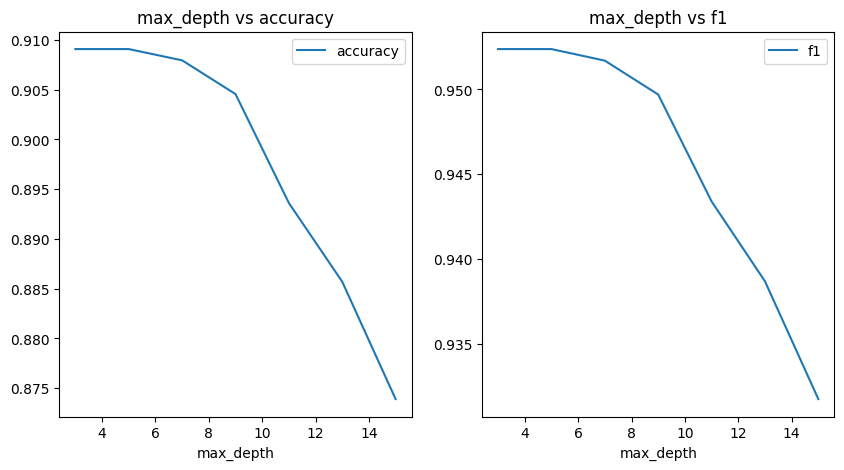

<Figure size 640x480 with 0 Axes>

In [275]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

dec_tree_measures.plot(x='max_depth', y='accuracy', ax=ax[0], title='max_depth vs accuracy')
dec_tree_measures.plot(x='max_depth', y='f1', ax=ax[1], title='max_depth vs f1')

plt.show()
plt.savefig('imgs/dec_tree_measures.png')

The results clearly show the importance of hyperparameter tuning on the tendency to create an overfitted model. The best results were obtained by limitting the `max_depth`of the tree to 5.

We can conclude that Decision Trees are a good choice for this dataset, but they require careful tuning to avoid overfitting.

### **K-Nearest Neighbors (KNN)**

KNN is a very intuitive and quite simple algorithm. It classifies new instances based on the **majority class of its k closest points**. It is a non-parametric algorithm that does not make any assumptions about the underlying data distribution.

Our dataset has 12 features and half of them are categorical. This can be a challenge for KNN, as it relies on the **distance between points** to classify them. Since categorical features have already been numerically encoded, the distance metric used will be the `Minkowski distance`. To boost the performance of the algorithm, we will **normalize the data** to ensure that all features contribute equally to the distance calculation.

The main hyperparameter to tune in KNN is the number of neighbors `k`. A small `k` can lead to overfitting, while a large `k` can lead to underfitting. The default value for this parameter is 5.

For this algorithm, the main computational efforts is in the **prediction phase**, where the distance between the new instance and all other instances in the dataset must be calculated. The training phase is very fast, as the model simply stores the data points. So, the time measure we will consider is the **prediction time**.

In [276]:
# Normalize the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.95823331,  0.75754538,  0.29219286, ..., -0.61962554,
        -0.29003363, -0.38079742],
       [-0.95823331,  0.75754538,  0.7487976 , ..., -0.60381   ,
        -0.8764188 , -0.38079742],
       [-0.95823331, -1.36831282, -0.46543278, ..., -0.60381   ,
        -1.46280397, -0.38079742],
       ...,
       [-0.95823331,  0.75754538, -0.27433524, ..., -0.60381   ,
        -0.29003363,  2.62606822],
       [-0.95823331,  0.75754538, -0.09676673, ..., -0.60381   ,
         1.46912188, -0.38079742],
       [ 1.04358718, -1.36831282,  0.45792347, ..., -0.61962554,
         0.88273671, -0.38079742]])

In [277]:
from sklearn.neighbors import KNeighborsClassifier

knn_measures = pd.DataFrame(columns=['n_neighbors', 'accuracy', 'f1', 'time_s'])

n_neighbors = list(range(1, 50, 2))
dist_metric = 'minkowski'

for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k, metric=dist_metric)
    model.fit(X_train_scaled, y_train)
    
    start_t = time.time()
    y_pred = model.predict(X_test_scaled)
    time_spent = time.time() - start_t

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    knn_measures.loc[len(knn_measures)] = [k, acc, f1, time_spent]

    print(f'n_neighbors: {k}\taccuracy: {acc}\tf1: {f1}\ttime: {time_spent}')

knn_measures

n_neighbors: 1	accuracy: 0.8509360649947015	f1: 0.9181536074476339	time: 2.430114984512329
n_neighbors: 3	accuracy: 0.8885199576121512	f1: 0.9404123555622688	time: 3.384354829788208
n_neighbors: 5	accuracy: 0.8980572235959025	f1: 0.94596517506085	time: 3.95456600189209
n_neighbors: 7	accuracy: 0.9030731190392087	f1: 0.9488517745302714	time: 4.390958070755005
n_neighbors: 9	accuracy: 0.9049805722359591	f1: 0.9499832657766539	time: 4.876522779464722
n_neighbors: 11	accuracy: 0.9063935005298481	f1: 0.9507892293407614	time: 5.28397798538208
n_neighbors: 13	accuracy: 0.9067467326033204	f1: 0.9510131373858829	time: 6.16384220123291
n_neighbors: 15	accuracy: 0.9075944895796538	f1: 0.951494474523474	time: 6.255979061126709
n_neighbors: 17	accuracy: 0.9079477216531261	f1: 0.9517067566065008	time: 6.58406400680542
n_neighbors: 19	accuracy: 0.9078770752384316	f1: 0.9516893894487255	time: 6.480163097381592
n_neighbors: 21	accuracy: 0.9077357824090427	f1: 0.9516188782692451	time: 6.304983854293823


,n_neighbors,accuracy,f1,time_s
0,1.0,0.850936,0.918154,2.430115
1,3.0,0.888520,0.940412,3.384355
2,5.0,0.898057,0.945965,3.954566
3,7.0,0.903073,0.948852,4.390958
4,9.0,0.904981,0.949983,4.876523
5,11.0,0.906394,0.950789,5.283978
6,13.0,0.906747,0.951013,6.163842
7,15.0,0.907594,0.951494,6.255979
8,17.0,0.907948,0.951707,6.584064
9,19.0,0.907877,0.951689,6.480163


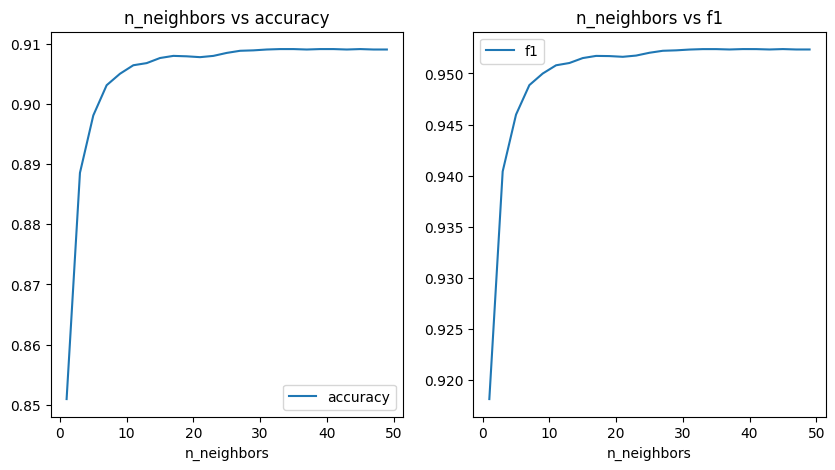

<Figure size 640x480 with 0 Axes>

In [278]:
# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

knn_measures.plot(x='n_neighbors', y='accuracy', ax=ax[0], title='n_neighbors vs accuracy')
knn_measures.plot(x='n_neighbors', y='f1', ax=ax[1], title='n_neighbors vs f1')

plt.show()
plt.savefig('imgs/knn_measures.png')

The results show a very interesting behaviour: Both accuracy and F1 score converge (respectively to 0.91 and 0.953) as the number of neighbors increases. The value obtains a good stability at `k = 25`. From `k = 1` to `k = 10`, the metrics improve significantly, but after that, the improvement is marginal.

The results of this algorithm are very good, such as the data-complexity measures suggested. The KNN algorithm is a good choice for this dataset, but it requires careful tuning of the number of neighbors and some amount of computational resources to make predictions.

### **Logistic Regression**

The last algorithm we will test is Logistic Regression. This algorithm is a **linear model** that is widely used for binary classification problems. It estimates the probability that a given instance belongs to a particular class.

The main hyperparameter to tune in Logistic Regression is the **regularization strength** `C`. Regularization helps prevent overfitting by penalizing large coefficients. The default value for this parameter is 1.0, but we will explore different values to find the best one.

In [279]:
from sklearn.linear_model import LogisticRegression

log_reg_measures = pd.DataFrame(columns=['C', 'accuracy', 'f1', 'time_s'])

cs = [0.001, 0.01, 0.1, 1, 10, 100]
solver = 'lbfgs'

for c in cs:
    model = LogisticRegression(C=c, solver=solver)
    
    start_t = time.time()
    model.fit(X_train_scaled, y_train)
    time_spent = time.time() - start_t

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    log_reg_measures.loc[len(log_reg_measures)] = [c, acc, f1, time_spent]

    print(f'C: {c}\taccuracy: {acc}\tf1: {f1}\ttime: {time_spent}')

log_reg_measures

C: 0.001	accuracy: 0.9090780642882373	f1: 0.9523739037116531	time: 0.025545120239257812
C: 0.01	accuracy: 0.9090074178735429	f1: 0.9523351343349863	time: 0.0256040096282959
C: 0.1	accuracy: 0.9089367714588484	f1: 0.9522963620887458	time: 0.027257919311523438
C: 1	accuracy: 0.9089367714588484	f1: 0.9522963620887458	time: 0.02679896354675293
C: 10	accuracy: 0.9089367714588484	f1: 0.9522963620887458	time: 0.02679300308227539
C: 100	accuracy: 0.9089367714588484	f1: 0.9522963620887458	time: 0.027347803115844727


,C,accuracy,f1,time_s
0,0.001,0.909078,0.952374,0.025545
1,0.010,0.909007,0.952335,0.025604
2,0.100,0.908937,0.952296,0.027258
3,1.000,0.908937,0.952296,0.026799
4,10.000,0.908937,0.952296,0.026793
5,100.000,0.908937,0.952296,0.027348


We can see that the different values of `C` do not have a significant impact on the performance of the model. 

The model achieved a good performance, with an accuracy ≈ 0.908 and an F1 score ≈ 0.952, which proves the good indicators we have observed in the data complexity analysis.

### **Decision Trees** *vs* **K-Nearest-Neighbors** *vs* **Logistic Regression**

In [280]:
results = pd.DataFrame(columns=['model', 'accuracy', 'f1', 'time_s'])

dtree = dec_tree_measures.loc[dec_tree_measures['max_depth'] == 5].iloc[0]
results.loc[len(results)] = ['DecisionTree', dtree['accuracy'], dtree['f1'], dtree['time_s']]

knn = knn_measures.loc[knn_measures['n_neighbors'] == 19].iloc[0]
results.loc[len(results)] = ['KNN', knn['accuracy'], knn['f1'], knn['time_s']]

log_reg = log_reg_measures.loc[log_reg_measures['C'] == 1].iloc[0]
results.loc[len(results)] = ['LogisticRegression', log_reg['accuracy'], log_reg['f1'], log_reg['time_s']]

results

,model,accuracy,f1,time_s
0,DecisionTree,0.909078,0.952374,0.141611
1,KNN,0.907877,0.951689,6.480163
2,LogisticRegression,0.908937,0.952296,0.026799


As we can see, all three algorithms achieved a similarly good performance on the dataset (accuracy ≈ 0.91 and F1 ≈ 0.95). This is expected given the strong linear characteristics, clear class separation, and well-clustered instances in the data. The algorithms were able to capture these patterns effectively and make accurate predictions.

The data-complexity analysis provided valuable insights into the characteristics of the dataset that could impact the performance of the algorithms.